# Run the whole deltas algorithm

In [14]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [15]:
binary = True
remove = []
minority_id = [0, 2, 4, 6, 1]
split = 0.8
ratio = None
epochs = 2
data_clf = data.get_real_dataset(
    'MNIST', scale=False, binary=binary, classes_remove=remove, minority_id=minority_id,
    split=split, ratio=ratio, equal_test=True)
# print(len(data_clf['data']['y']))
# print(sum(data_clf['data']['y']))
# import numpy as np
# print(np.unique(data_clf['data']['y']))
# deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])

torch to numpy MNIST:   2%|▏         | 4/234 [00:00<00:06, 34.39it/s]

MNIST: 59847
Number of attribues: 784
Classes total: 29617 - 30230

Classes train: 23693 - 24306
Classes test:  5924 - 5924


## Get Classifier

Train Epoch: 0: -4785.44482421875
Train Epoch: 1: -4512.921875
Train Epoch: 0: -4541.27197265625
Train Epoch: 1: -4850.2197265625
Original


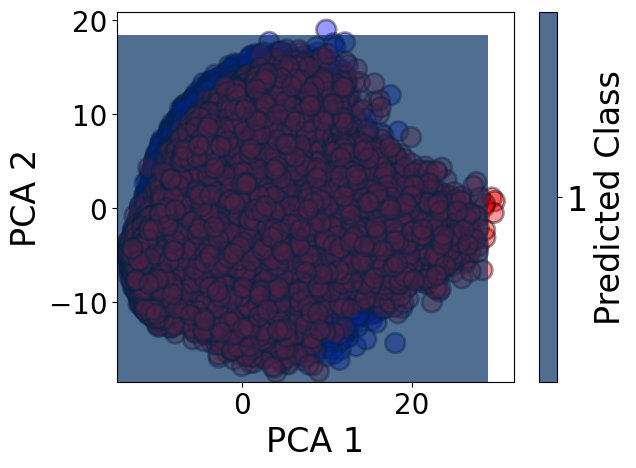

SMOTE


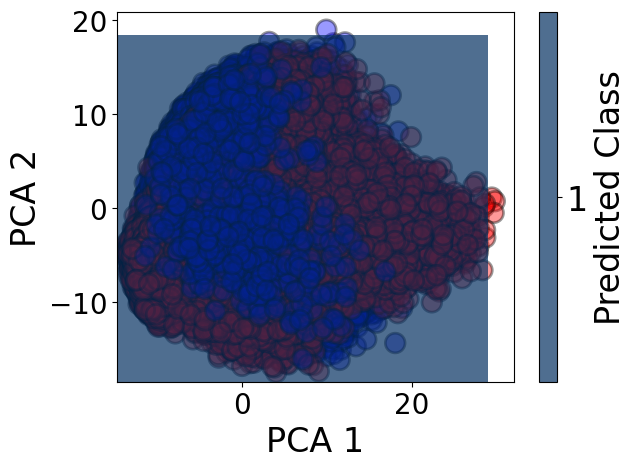

BMR


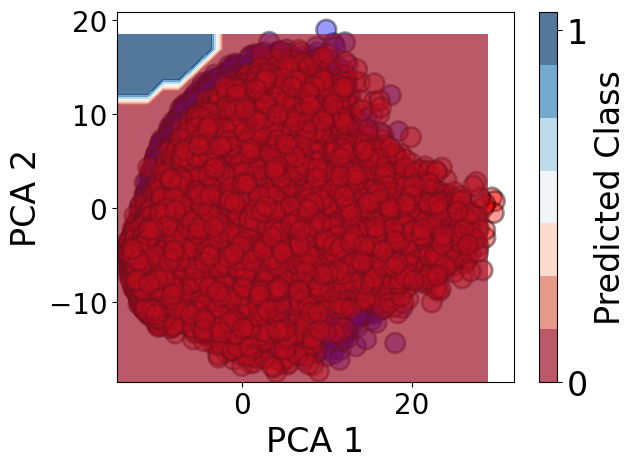

Threshold


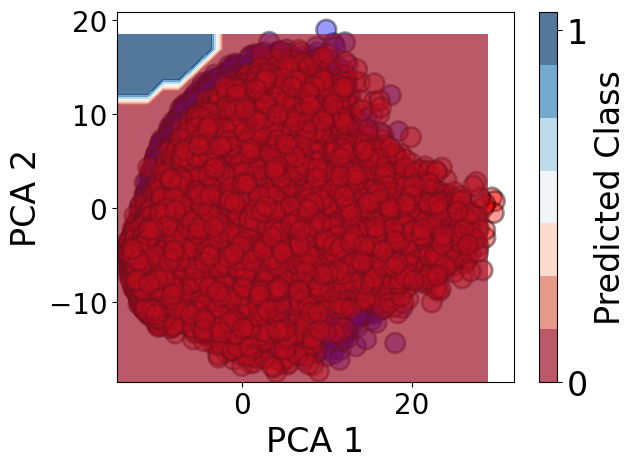

Original :
train set: Accuracy: 23693/47999 (49%)
test  set: Accuracy: 5924/11848 (50%)
SMOTE :
train set: Accuracy: 23693/47999 (49%)
test  set: Accuracy: 5924/11848 (50%)


In [16]:
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model='MNIST',
                      binary=True,
                      epochs=epochs)

data_clf['clf'] = classifiers_dict['Baseline']

for clf in ['Baseline', 'SMOTE']:
    print(clf, ':')
    classifiers_dict[clf].test(data_clf['data']['X'],
                            data_clf['data']['y'], data_s='train')
    classifiers_dict[clf].test(data_clf['data_test']['X'],
                            data_clf['data_test']['y'], data_s='test ')

## Fit deltas

In [41]:
classifiers_dict['Baseline'].test(data_clf['data']['X'],
                           data_clf['data']['y'], data_s='train')

train set: Accuracy: 47236/47999 (98%)


Original Data


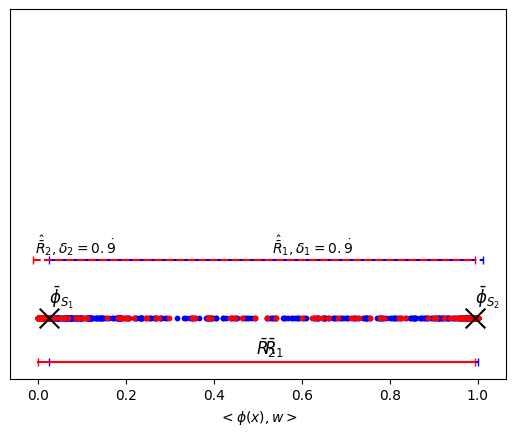

Budget 1000 found 9 viable downsampled solutions
Best solution found by removing 939 data points
Downsampled Data:


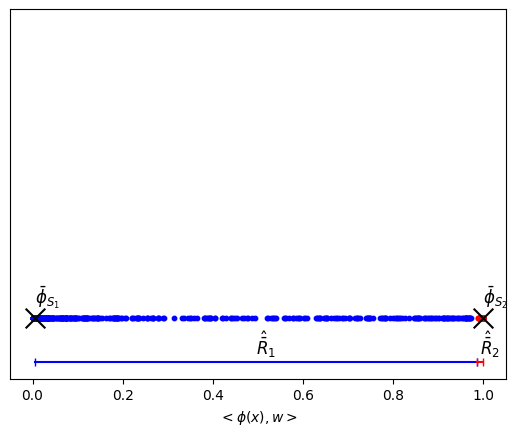

In [35]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=10,
                                                     _print=True, 
                                                     _plot=True,
                                                     method='supports-prop-update_mean',
                                                     max_trials=1000,
                                                     parallel=True)

## Plot training data information

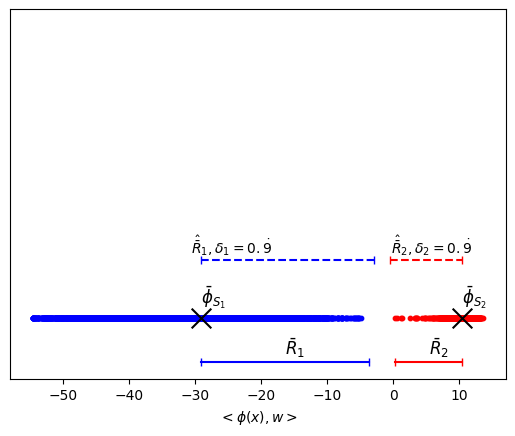

In [ ]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

## Show parameters

In [36]:
deltas_model.print_params()

Parameters
                R:  1.0
                N1: 23229
                N2: 23831
                R1: 0.9664406995276634
                R2: 0.013124780538154024
                M:  0.014733195304870605
                D:  0.9942986753706881
                C1: 1
                C2: 1


# Evaluation on test data

            Accuracy    G-Mean   ROC-AUC        F1
Method                                            
Original    0.981723  0.981568  0.981723  0.981398
SMOTE       0.986715  0.986670  0.986715  0.986589
BMR         0.986634  0.986572  0.986634  0.986484
Threshold   0.986715  0.986653  0.986715  0.986567
Our Method  0.983655  0.983543  0.983655  0.983408 


Original


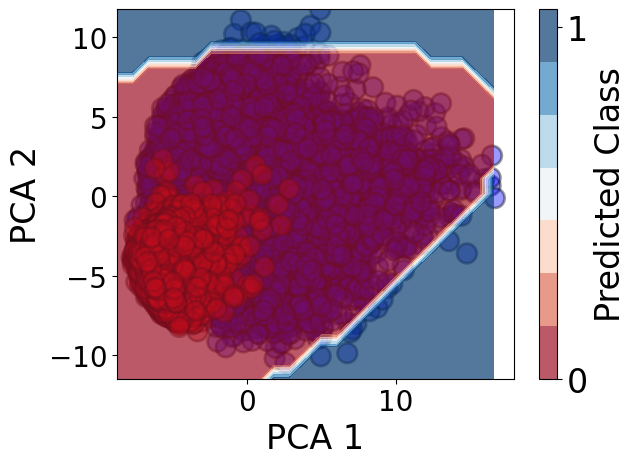

SMOTE


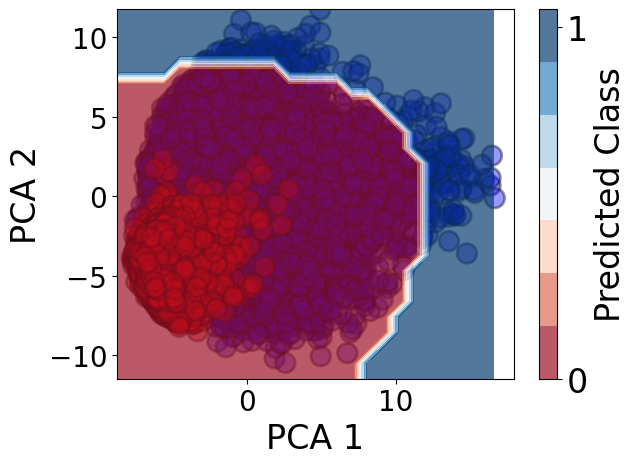

BMR


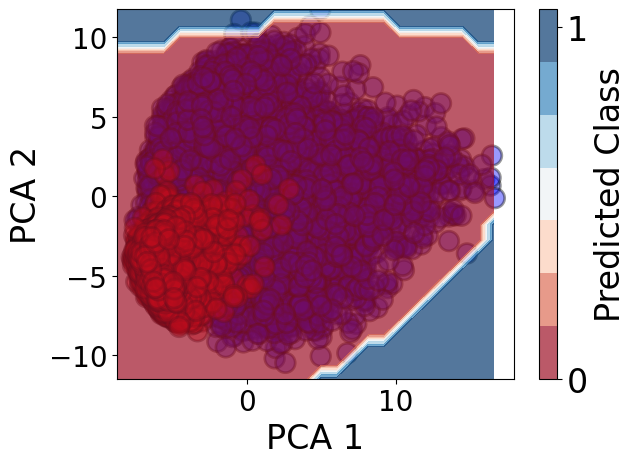

Threshold


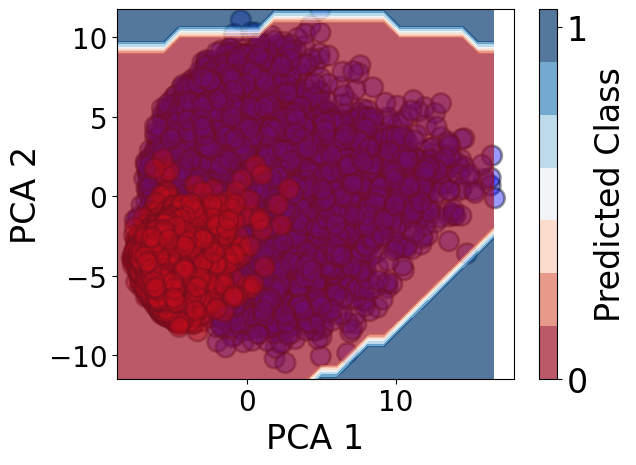

Our Method


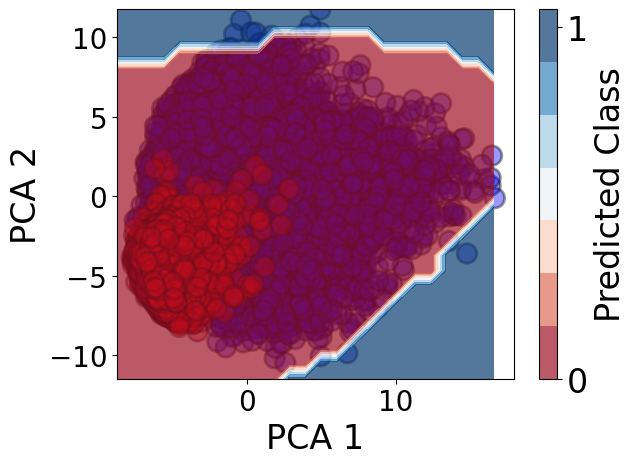

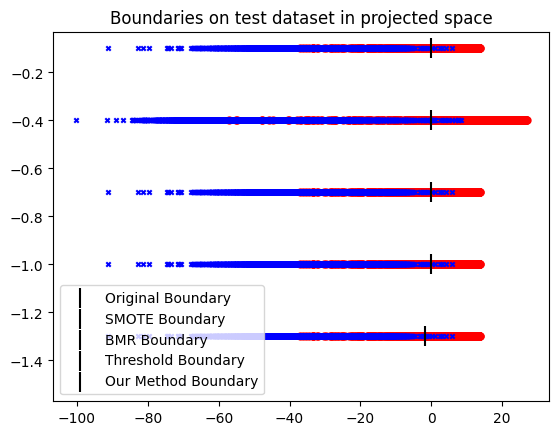

LATEX table format


\begin{tabular}{lrrrr}
 & Accuracy & G-Mean & ROC-AUC & F1 \\
Method &  &  &  &  \\
Original & 0.9817 & 0.9816 & 0.9817 & 0.9814 \\
SMOTE & 0.9867 & 0.9867 & 0.9867 & 0.9866 \\
BMR & 0.9866 & 0.9866 & 0.9866 & 0.9865 \\
Threshold & 0.9867 & 0.9867 & 0.9867 & 0.9866 \\
Our Method & 0.9837 & 0.9835 & 0.9837 & 0.9834 \\
\end{tabular}



,Accuracy,G-Mean,ROC-AUC,F1
Method,,,,
Original,0.981723,0.981568,0.981723,0.981398
SMOTE,0.986715,0.986670,0.986715,0.986589
BMR,0.986634,0.986572,0.986634,0.986484
Threshold,0.986715,0.986653,0.986715,0.986567
Our Method,0.983655,0.983543,0.983655,0.983408


In [ ]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])